<a href="https://colab.research.google.com/github/drshahizan/SECP3843/blob/main/submission/radindafina/question4/files/code/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
import json
from pandas import json_normalize

with open('/content/drive/MyDrive/supplystore.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame.from_records(data)

# Display the DataFrame
display(df)

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': {'$numberLong': '1427144809506'}},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': {'$numberInt': '42'}, '...",True,Online
1,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': {'$numberLong': '1440496862918'}},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': {'$numberInt': '50'}, '...",False,Phone
2,{'$oid': '5bd761dcae323e45a93ccfea'},{'$date': {'$numberLong': '1498125254185'}},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': {'$numberInt': '51'}, '...",False,In store
3,{'$oid': '5bd761dcae323e45a93ccfeb'},{'$date': {'$numberLong': '1424685239343'}},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': {'$numberInt': '45'}, '...",False,In store
4,{'$oid': '5bd761dcae323e45a93ccfec'},{'$date': {'$numberLong': '1512326388253'}},"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': {'$numberInt': '40'}, '...",False,In store
...,...,...,...,...,...,...,...
4995,{'$oid': '5bd761deae323e45a93ce36b'},{'$date': {'$numberLong': '1453310950225'}},"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,"{'gender': 'F', 'age': {'$numberInt': '45'}, '...",False,In store
4996,{'$oid': '5bd761deae323e45a93ce36c'},{'$date': {'$numberLong': '1417255781573'}},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'F', 'age': {'$numberInt': '47'}, '...",False,In store
4997,{'$oid': '5bd761deae323e45a93ce36d'},{'$date': {'$numberLong': '1514185371283'}},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': {'$numberInt': '29'}, '...",False,In store
4998,{'$oid': '5bd761deae323e45a93ce36e'},{'$date': {'$numberLong': '1386414385510'}},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': {'$numberInt': '59'}, '...",False,Online


In [4]:
df['_id'] = df['_id'].str['$oid']
df

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,5bd761dcae323e45a93ccfe8,{'$date': {'$numberLong': '1427144809506'}},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': {'$numberInt': '42'}, '...",True,Online
1,5bd761dcae323e45a93ccfe9,{'$date': {'$numberLong': '1440496862918'}},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': {'$numberInt': '50'}, '...",False,Phone
2,5bd761dcae323e45a93ccfea,{'$date': {'$numberLong': '1498125254185'}},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': {'$numberInt': '51'}, '...",False,In store
3,5bd761dcae323e45a93ccfeb,{'$date': {'$numberLong': '1424685239343'}},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': {'$numberInt': '45'}, '...",False,In store
4,5bd761dcae323e45a93ccfec,{'$date': {'$numberLong': '1512326388253'}},"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': {'$numberInt': '40'}, '...",False,In store
...,...,...,...,...,...,...,...
4995,5bd761deae323e45a93ce36b,{'$date': {'$numberLong': '1453310950225'}},"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,"{'gender': 'F', 'age': {'$numberInt': '45'}, '...",False,In store
4996,5bd761deae323e45a93ce36c,{'$date': {'$numberLong': '1417255781573'}},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'F', 'age': {'$numberInt': '47'}, '...",False,In store
4997,5bd761deae323e45a93ce36d,{'$date': {'$numberLong': '1514185371283'}},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': {'$numberInt': '29'}, '...",False,In store
4998,5bd761deae323e45a93ce36e,{'$date': {'$numberLong': '1386414385510'}},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': {'$numberInt': '59'}, '...",False,Online


In [5]:
df['saleDate'] = df['saleDate'].apply(lambda x: x['$date']['$numberLong'])

In [6]:
# Splitting Customer Data
df['gender'] = df['customer'].apply(lambda x: x['gender'] if pd.notnull(x) else np.nan)
df['age'] = df['customer'].apply(lambda x: x['age']['$numberInt'] if pd.notnull(x) and 'age' in x and '$numberInt' in x['age'] else np.nan)
df['email'] = df['customer'].apply(lambda x: x['email'] if pd.notnull(x) else np.nan)
df['satisfaction'] = df['customer'].apply(lambda x: x['satisfaction']['$numberInt'] if pd.notnull(x) and 'satisfaction' in x and '$numberInt' in x['satisfaction'] else np.nan)

# Drop the original "customer" column
df.drop('customer', axis=1, inplace=True)

In [7]:
df

,_id,saleDate,items,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction
0,5bd761dcae323e45a93ccfe8,1427144809506,"[{'name': 'printer paper', 'tags': ['office', ...",Denver,True,Online,M,42,cauho@witwuta.sv,4
1,5bd761dcae323e45a93ccfe9,1440496862918,"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,False,Phone,M,50,keecade@hem.uy,5
2,5bd761dcae323e45a93ccfea,1498125254185,"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,False,In store,M,51,worbiduh@vowbu.cg,5
3,5bd761dcae323e45a93ccfeb,1424685239343,"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,False,In store,F,45,vatires@ta.pe,3
4,5bd761dcae323e45a93ccfec,1512326388253,"[{'name': 'backpack', 'tags': ['school', 'trav...",London,False,In store,M,40,dotzu@ib.sh,4
...,...,...,...,...,...,...,...,...,...,...
4995,5bd761deae323e45a93ce36b,1453310950225,"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,False,In store,F,45,du@rum.py,3
4996,5bd761deae323e45a93ce36c,1417255781573,"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,False,In store,F,47,dup@katjewtep.hr,3
4997,5bd761deae323e45a93ce36d,1514185371283,"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,False,In store,M,29,losuhse@eronehjod.np,4
4998,5bd761deae323e45a93ce36e,1386414385510,"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,False,Online,M,59,hu@pehabur.gd,4


In [8]:
df['item_names'] = df['items'].apply(lambda x: [item['name'] for item in x] if isinstance(x, list) else [])
df['item_tags'] = df['items'].apply(lambda x: [item['tags'] for item in x] if isinstance(x, list) else [])
df['item_prices'] = df['items'].apply(lambda x: [float(item['price']['$numberDecimal']) for item in x] if isinstance(x, list) else [])
df['item_quantities'] = df['items'].apply(lambda x: [int(item['quantity']['$numberInt']) for item in x] if isinstance(x, list) else [])

# Drop the original "items" column
df.drop('items', axis=1, inplace=True)

In [9]:
df

,_id,saleDate,storeLocation,couponUsed,purchaseMethod,gender,age,email,satisfaction,item_names,item_tags,item_prices,item_quantities
0,5bd761dcae323e45a93ccfe8,1427144809506,Denver,True,Online,M,42,cauho@witwuta.sv,4,"[printer paper, notepad, pens, backpack, notep...","[[office, stationary], [office, writing, schoo...","[40.01, 35.29, 56.12, 77.71, 18.47, 19.95, 8.0...","[2, 2, 5, 2, 2, 8, 3, 3]"
1,5bd761dcae323e45a93ccfe9,1440496862918,Seattle,False,Phone,M,50,keecade@hem.uy,5,"[envelopes, binder, notepad, laptop, notepad, ...","[[stationary, office, general], [school, gener...","[8.05, 28.31, 20.95, 866.5, 33.09, 37.55, 83.2...","[10, 9, 3, 4, 4, 1, 2, 4, 2]"
2,5bd761dcae323e45a93ccfea,1498125254185,Denver,False,In store,M,51,worbiduh@vowbu.cg,5,"[notepad, binder, notepad, pens, printer paper...","[[office, writing, school], [school, general, ...","[30.08, 24.68, 32.1, 31.41, 43.56, 68.95, 8.57...","[1, 7, 4, 3, 3, 4, 4, 2, 4]"
3,5bd761dcae323e45a93ccfeb,1424685239343,Seattle,False,In store,F,45,vatires@ta.pe,3,"[binder, pens, backpack, printer paper, notepa...","[[school, general, organization], [writing, of...","[20.08, 23.08, 82.73, 15.98, 27.24, 27.7, 59.8...","[1, 4, 2, 3, 4, 5, 5, 9, 1]"
4,5bd761dcae323e45a93ccfec,1512326388253,London,False,In store,M,40,dotzu@ib.sh,4,"[backpack, notepad, binder, pens, notepad, env...","[[school, travel, kids], [office, writing, sch...","[127.59, 17.6, 18.67, 60.56, 28.41, 15.28, 125...","[3, 4, 2, 3, 1, 7, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5bd761deae323e45a93ce36b,1453310950225,Austin,False,In store,F,45,du@rum.py,3,"[pens, binder, pens, notepad, backpack, notepa...","[[writing, office, school, stationary], [schoo...","[22.52, 28.21, 22.63, 36.2, 165.21, 37.39, 24.36]","[2, 5, 2, 3, 5, 1, 4]"
4996,5bd761deae323e45a93ce36c,1417255781573,Denver,False,In store,F,47,dup@katjewtep.hr,3,"[pens, binder, printer paper, notepad, pens]","[[writing, office, school, stationary], [schoo...","[63.23, 13.39, 35.32, 7.27, 65.52]","[1, 4, 1, 5, 1]"
4997,5bd761deae323e45a93ce36d,1514185371283,Denver,False,In store,M,29,losuhse@eronehjod.np,4,"[binder, binder, pens, notepad, printer paper,...","[[school, general, organization], [school, gen...","[10.81, 18.0, 26.84, 28.33, 14.24, 780.93, 17....","[1, 10, 5, 1, 4, 3, 10, 1]"
4998,5bd761deae323e45a93ce36e,1386414385510,Denver,False,Online,M,59,hu@pehabur.gd,4,"[notepad, pens]","[[office, writing, school], [writing, office, ...","[33.15, 6.83]","[3, 5]"


In [10]:
df.shape

(5000, 13)

In [11]:
df.isna().sum()

_id                0
saleDate           0
storeLocation      0
couponUsed         0
purchaseMethod     0
gender             0
age                0
email              0
satisfaction       0
item_names         0
item_tags          0
item_prices        0
item_quantities    0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

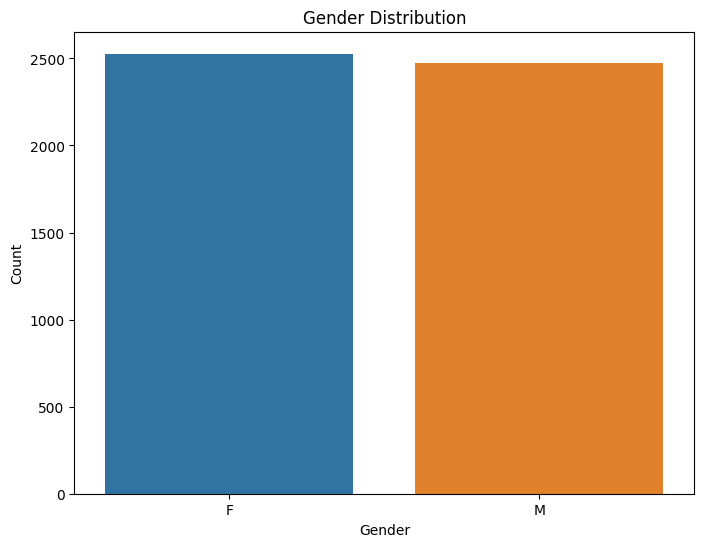

In [17]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

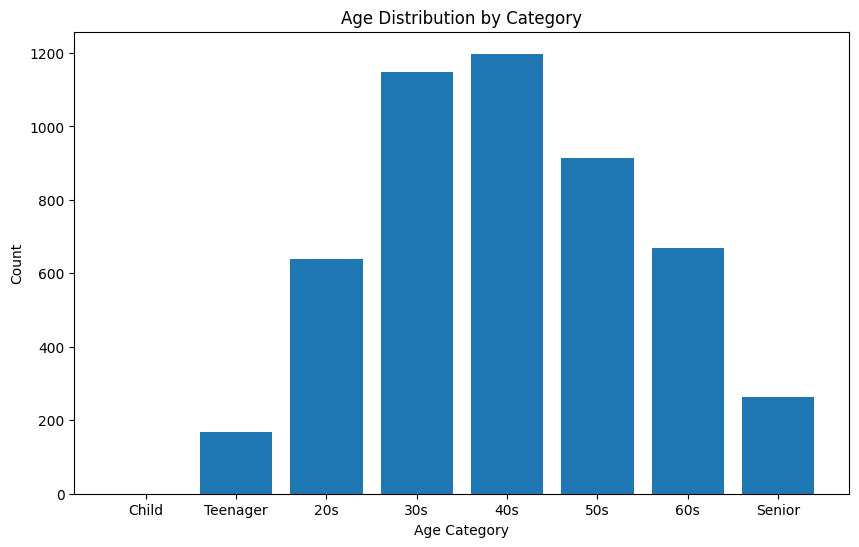

In [18]:
# Convert 'age' column to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Define age categories
age_bins = [0, 12, 19, 29, 39, 49, 59, 69, 120]
age_labels = ['Child', 'Teenager', '20s', '30s', '40s', '50s', '60s', 'Senior']

# Classify age into categories
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate count of each age category
age_counts = df['age_category'].value_counts().sort_index()

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(age_labels, age_counts)

# Set labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Distribution by Category')

# Show the plot
plt.show()


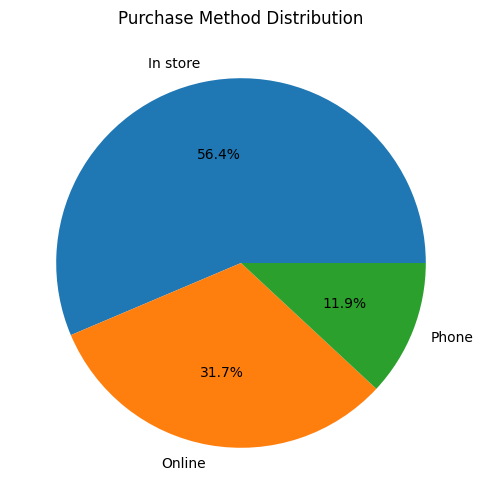

In [19]:
# Count the occurrences of each purchase method
purchase_counts = df['purchaseMethod'].value_counts()

# Plot the pie chart for purchase method
plt.figure(figsize=(8, 6))
plt.pie(purchase_counts.values, labels=purchase_counts.index, autopct='%1.1f%%')
plt.title('Purchase Method Distribution')
plt.show()

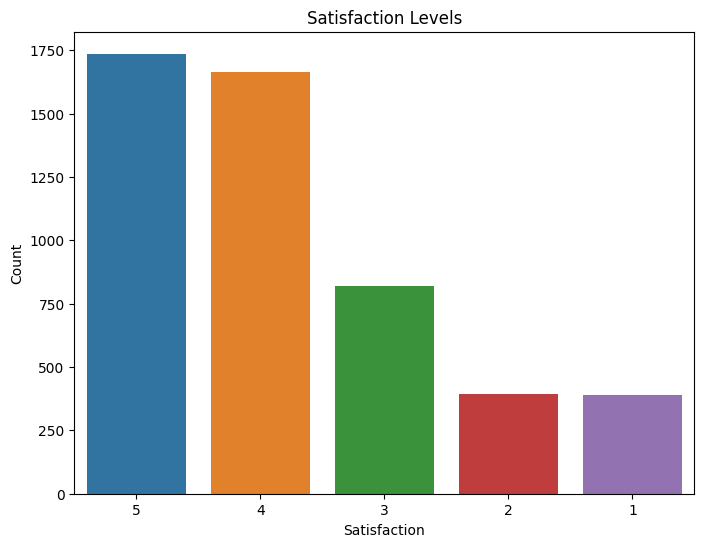

In [20]:
# Count the occurrences of each satisfaction level
satisfaction_counts = df['satisfaction'].value_counts()

# Plot the satisfaction levels
plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Levels')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Selecting the features and target variable
X = df[['age', 'gender']]
y = df['purchaseMethod']

# Performing one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.576


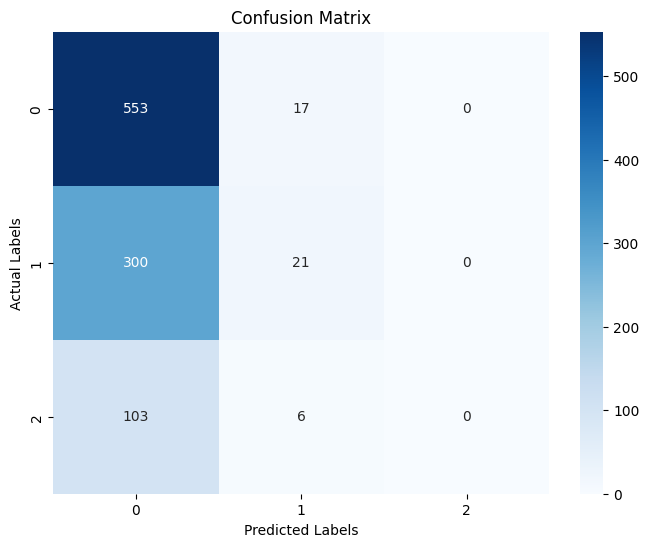

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()